<a href="https://colab.research.google.com/github/Monsin93/PDL1_KNIME_QSAR/blob/main/FeturesSelectionandSHAP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Selection

 feature befor fitering: 119
amount of example: 2413
amount of feature after low variance filter: 105
amount of feature after remove high correlation : 34
amount offeature after remove feature not related to target: 28
Important Feature : ['SlogP', 'SMR', 'NumRings', 'NumAromaticRings', 'NumAromaticHeterocycles', 'NumAromaticCarbocycles', 'slogp_VSA4', 'slogp_VSA7', 'slogp_VSA8', 'slogp_VSA10', 'slogp_VSA11', 'smr_VSA4', 'smr_VSA6', 'peoe_VSA3', 'peoe_VSA4', 'peoe_VSA5', 'peoe_VSA10', 'peoe_VSA11', 'peoe_VSA14', 'MQN11', 'MQN28', 'MQN35', 'MQN36']
amount of feature: 23


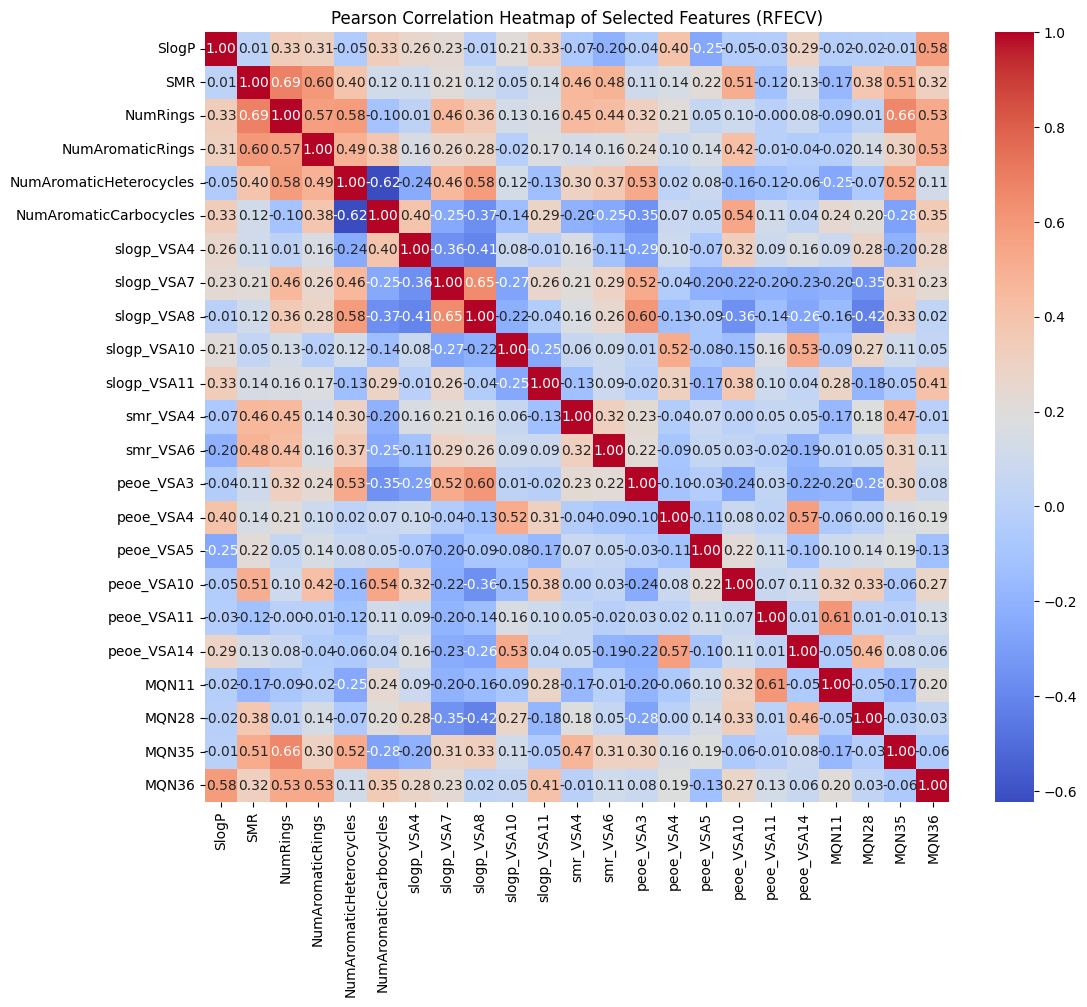

/tmp/ipython-input-3298602176.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target_final.index, y=corr_with_target_final.values, palette="viridis")


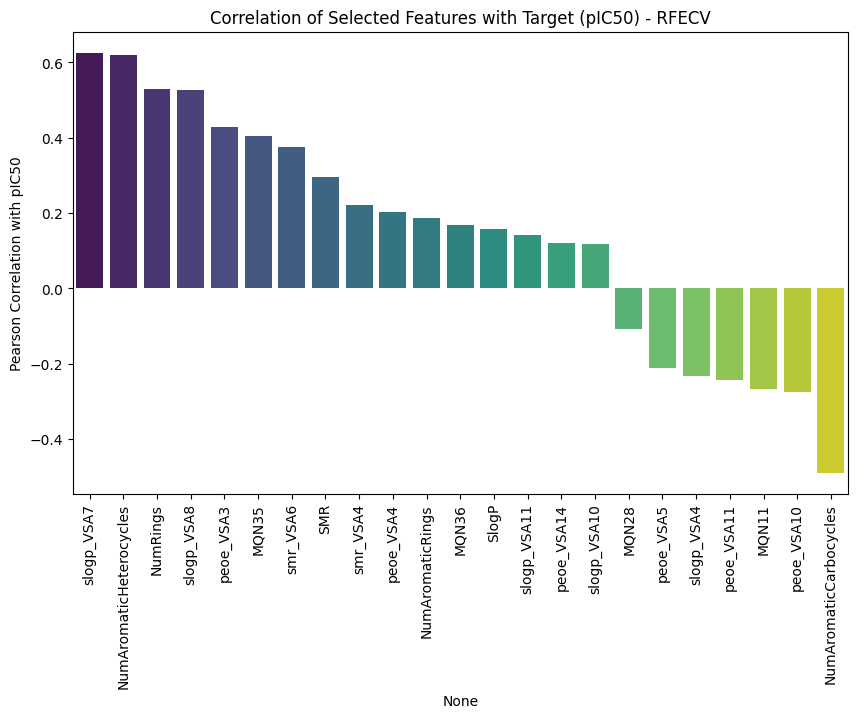

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.ensemble import RandomForestRegressor

# =======================
#
# =======================
file_path = "pd1ver2.csv"
target_column = "pIC50"

data = pd.read_csv(file_path)

#
data = data.dropna(subset=[target_column])

y = data[target_column]
X = data.drop(columns=[target_column])

print(f" feature befor fitering: {X.shape[1]}")
print(f"amount of example: {X.shape[0]}")

# =======================
# Low Variance Filter
# =======================
var_thresh = 0.1
selector = VarianceThreshold(threshold=var_thresh)
X_high_var = pd.DataFrame(selector.fit_transform(X), columns=X.columns[selector.get_support()])

print(f"amount of feature after low variance filter: {X_high_var.shape[1]}")

# =======================
# Remove features correlation |r| > 0.7
# =======================
corr_matrix = X_high_var.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.7)]
X_uncorrelated = X_high_var.drop(columns=to_drop)

print(f"amount of feature after remove high correlation : {X_uncorrelated.shape[1]}")

# =======================
# correlation with target (threshold 0.1)
# =======================
corr_with_target = X_uncorrelated.corrwith(y)
selected_features = corr_with_target[corr_with_target.abs() > 0.1].index
X_selected = X_uncorrelated[selected_features]

print(f"amount offeature after remove feature not related to target: {X_selected.shape[1]}")

# =======================
#  Recursive Feature Elimination with Cross-Validation (RFECV) with Random Forest
# =======================
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# RFECV select feature automatically (cv=5)
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='r2')
rfecv.fit(X_selected, y)

# select important features
X_final = X_selected[X_selected.columns[rfecv.support_]]
print(f"Important Feature : {list(X_final.columns)}")
print(f"amount of feature: {X_final.shape[1]}")

# =======================
# Heatmap  Pearson correlation final features
# =======================
plt.figure(figsize=(12, 10))
sns.heatmap(X_final.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Heatmap of Selected Features (RFECV)")
plt.show()

# =======================
#  Bar plot  Pearson correlation coefficient vs target (pIC50)
# =======================
corr_with_target_final = X_final.corrwith(y).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target_final.index, y=corr_with_target_final.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Pearson Correlation with pIC50")
plt.title("Correlation of Selected Features with Target (pIC50) - RFECV")
plt.show()

/tmp/ipython-input-2709531239.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target_final.index, y=corr_with_target_final.values, palette="viridis")


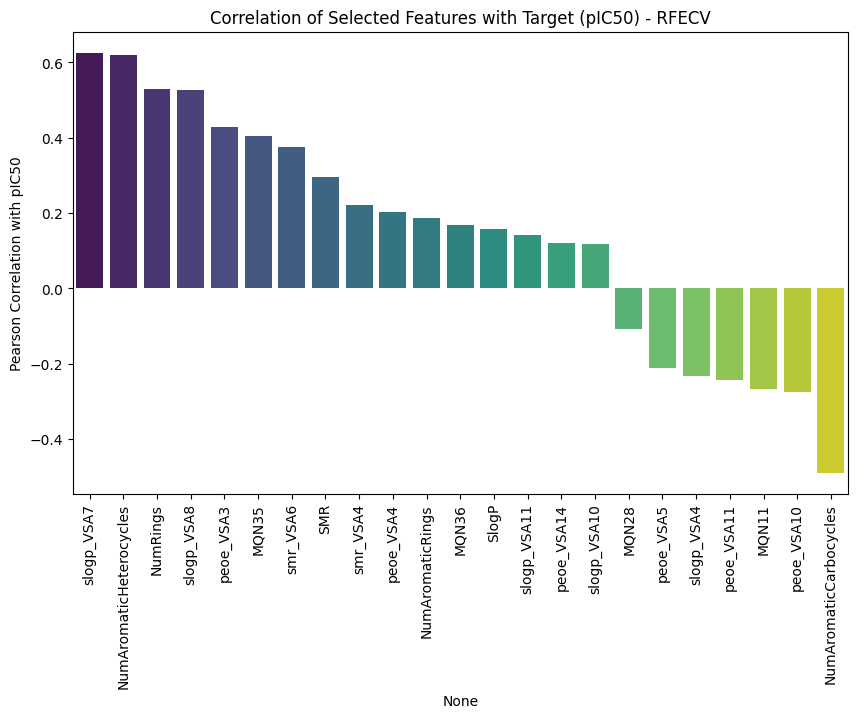

In [2]:
corr_with_target_final = X_final.corrwith(y).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target_final.index, y=corr_with_target_final.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Pearson Correlation with pIC50")
plt.title("Correlation of Selected Features with Target (pIC50) - RFECV")
plt.show()

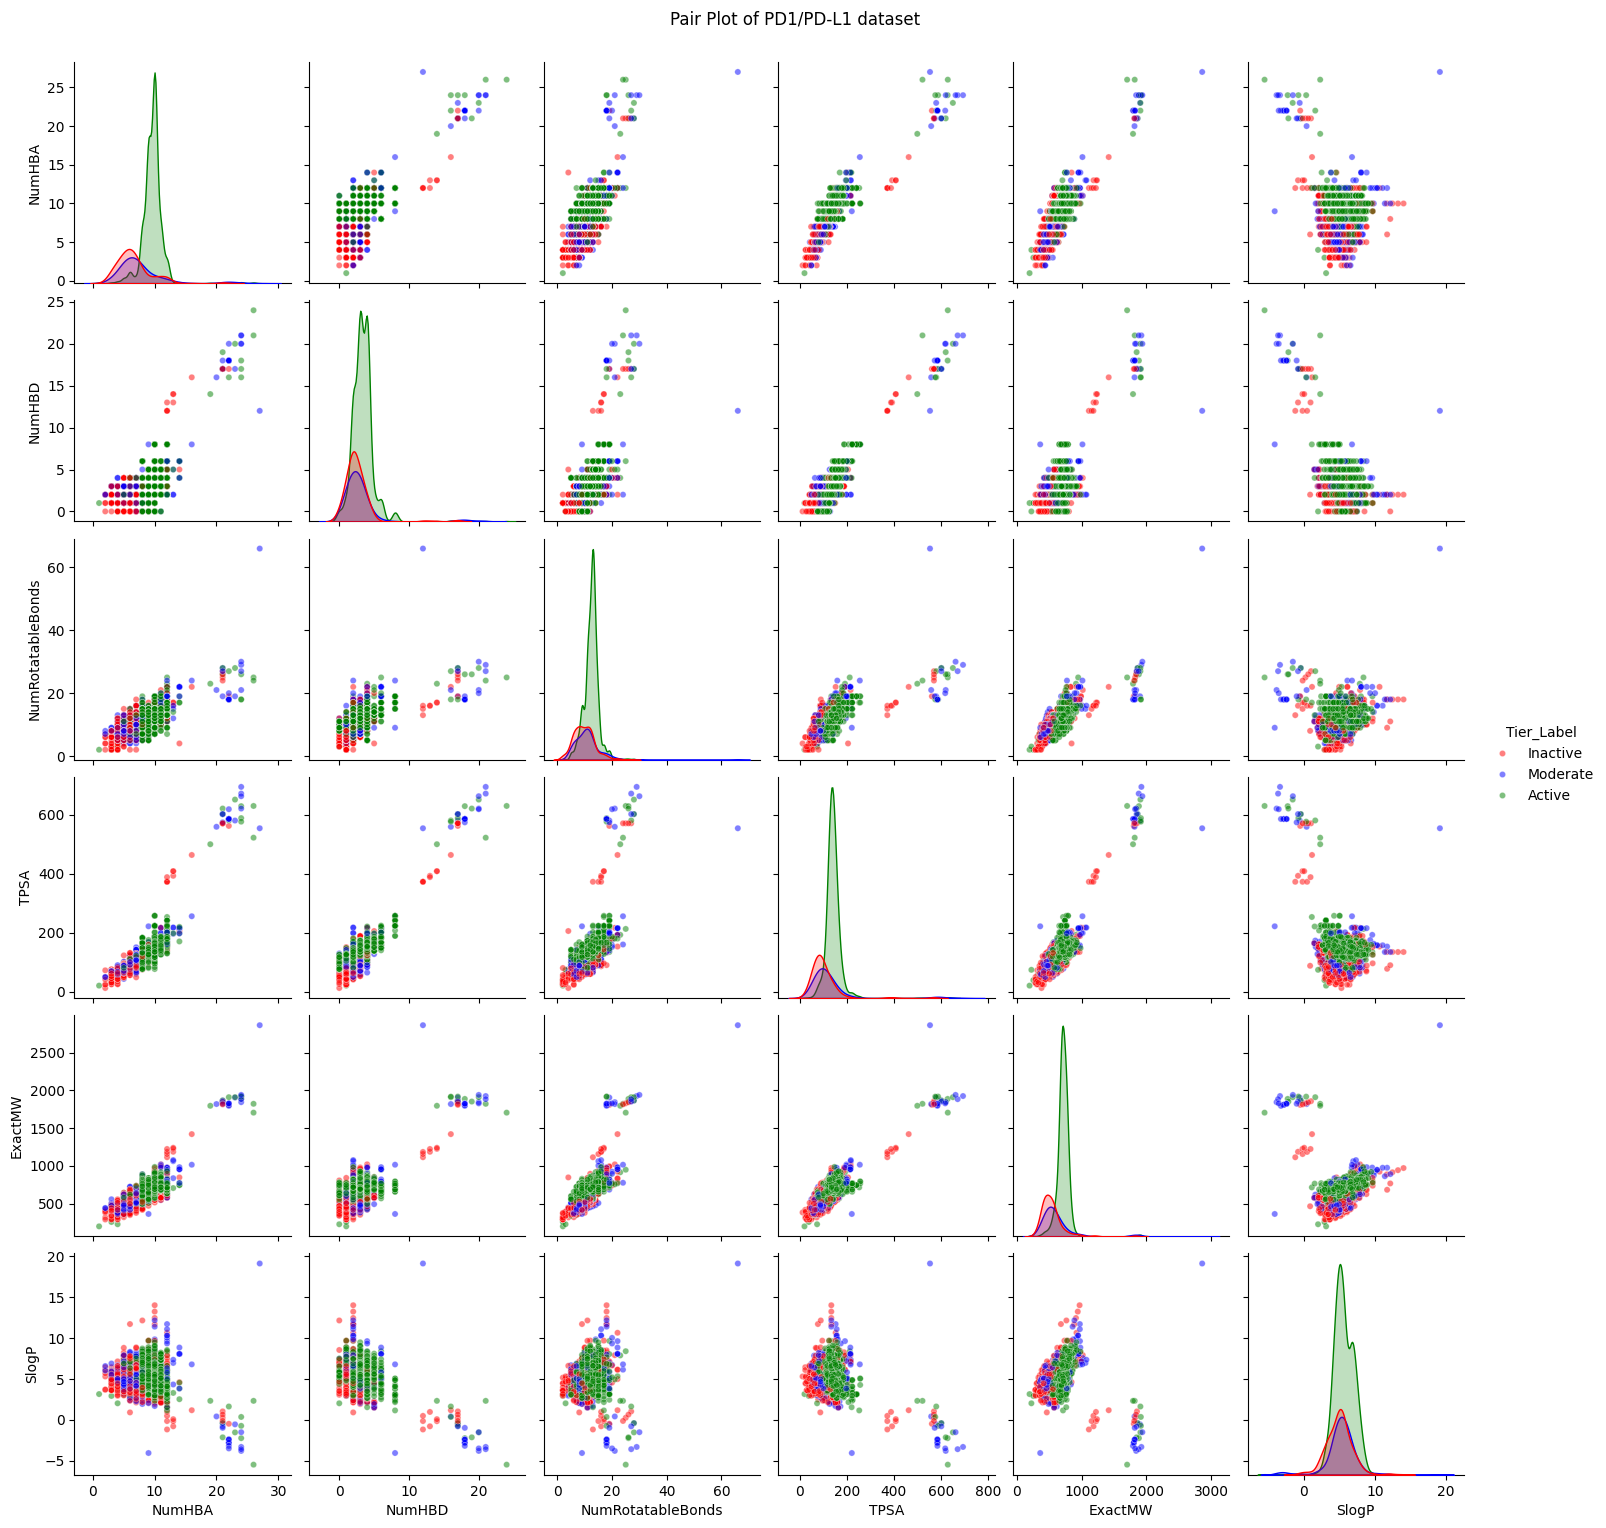

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
#
# ----------------------------
df = pd.read_csv("pd1ver2.1.csv")

# ----------------------------
#
# ----------------------------
tier_label_map = {
    1.0: "Active",
    0.5: "Moderate",
    0.0: "Inactive"
}

# (Active/Moderate/Inactive)
df["Tier_Label"] = df["Tier"].map(tier_label_map)

# ----------------------------
# Pair Plot
# ----------------------------
features = ["NumHBA", "NumHBD", "NumRotatableBonds", "TPSA", "ExactMW", "SlogP"]

tier_palette = {
    "Inactive": "red",
    "Moderate": "blue",
    "Active": "green"
}

sns.pairplot(
    df,
    vars=features,
    hue="Tier_Label",
    diag_kind="kde",
    palette=tier_palette,
    plot_kws={'alpha':0.5, 's':20}
)

plt.suptitle("Pair Plot of PD1/PD-L1 dataset", y=1.02)
plt.show()


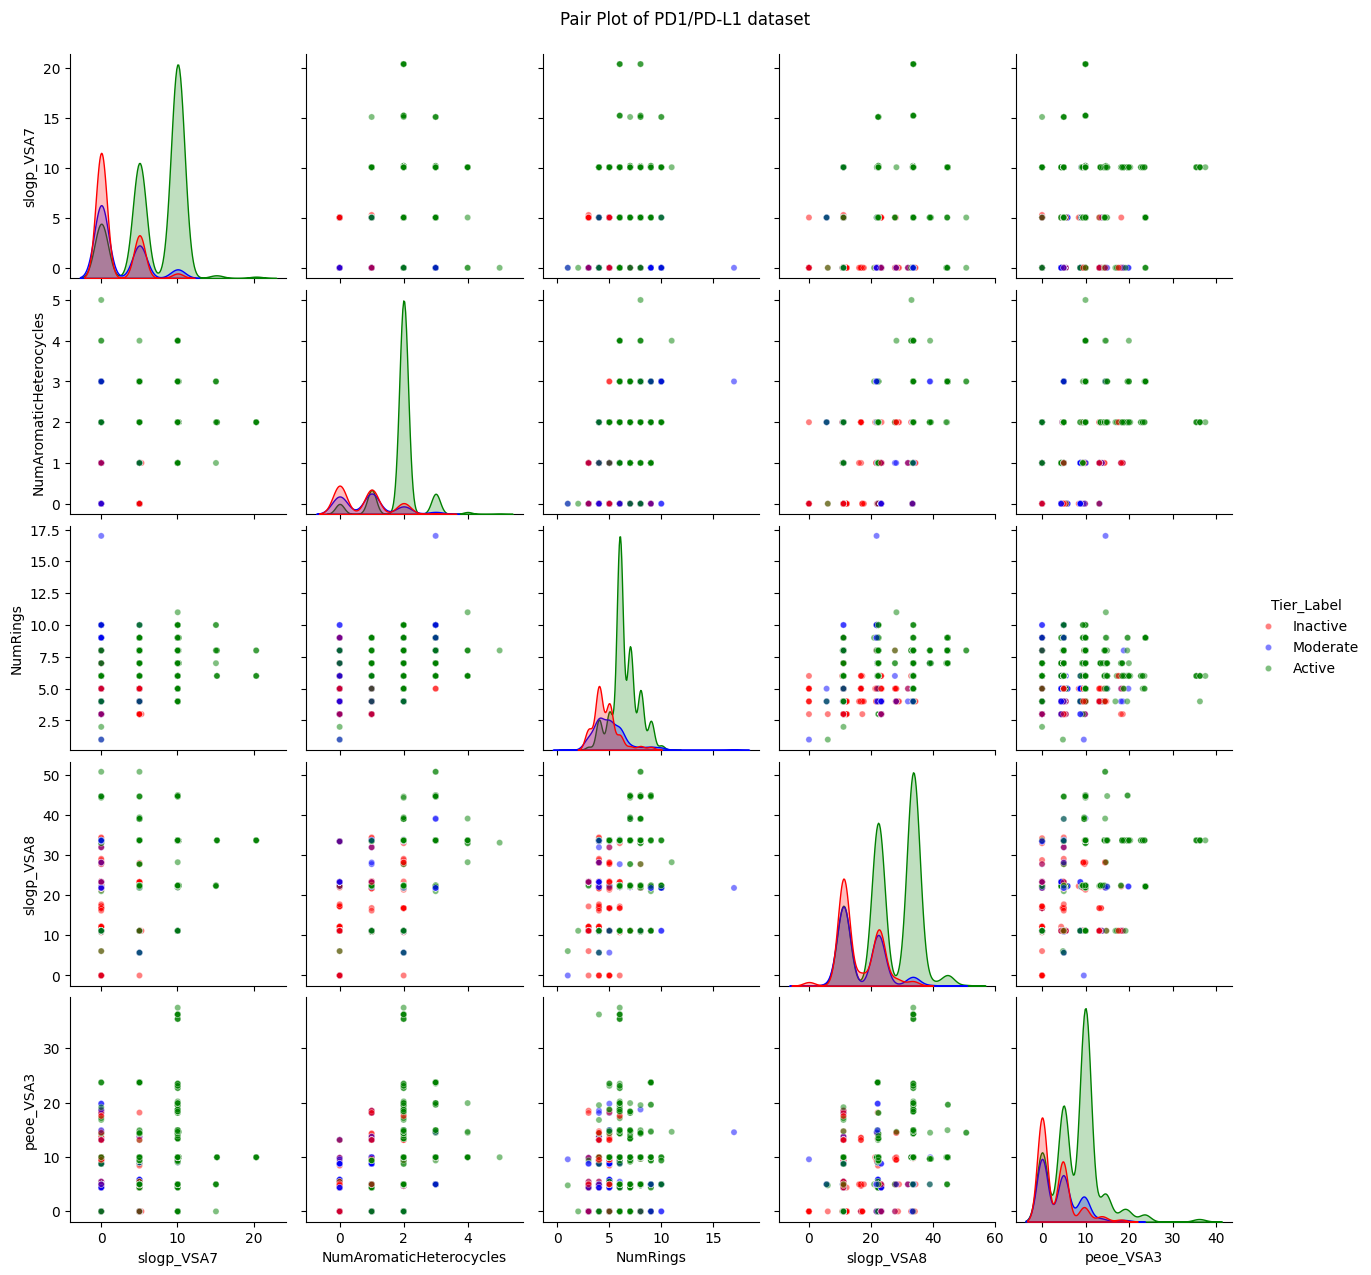

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------
#
# ----------------------------
df = pd.read_csv("pd1ver2.1.csv")

# ----------------------------
#
# ----------------------------
tier_label_map = {
    1.0: "Active",
    0.5: "Moderate",
    0.0: "Inactive"
}

# (Active/Moderate/Inactive)
df["Tier_Label"] = df["Tier"].map(tier_label_map)

# ----------------------------
# Pair Plot
# ----------------------------
features = ["slogp_VSA7", "NumAromaticHeterocycles", "NumRings", "slogp_VSA8", "peoe_VSA3"]

tier_palette = {
    "Inactive": "red",
    "Moderate": "blue",
    "Active": "green"
}

sns.pairplot(
    df,
    vars=features,
    hue="Tier_Label",
    diag_kind="kde",
    palette=tier_palette,
    plot_kws={'alpha':0.5, 's':20}
)

plt.suptitle("Pair Plot of PD1/PD-L1 dataset", y=1.02)
plt.show()

In [5]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# SHAP Analysis

In [9]:
# 23 Descriptors + Fingerprints for train and pIC50
df = pd.read_csv('PDL1_Data_externalvalidationset.csv')

# X (Features)  y (Target pIC50)
X = df.drop(columns=['pIC50'])
y = df['pIC50']

#  Random Forest
# [cite: 292]  1000 estimators
model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
model.fit(X, y)

# 3. SHAP ใช้ TreeExplainer  Random Forest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

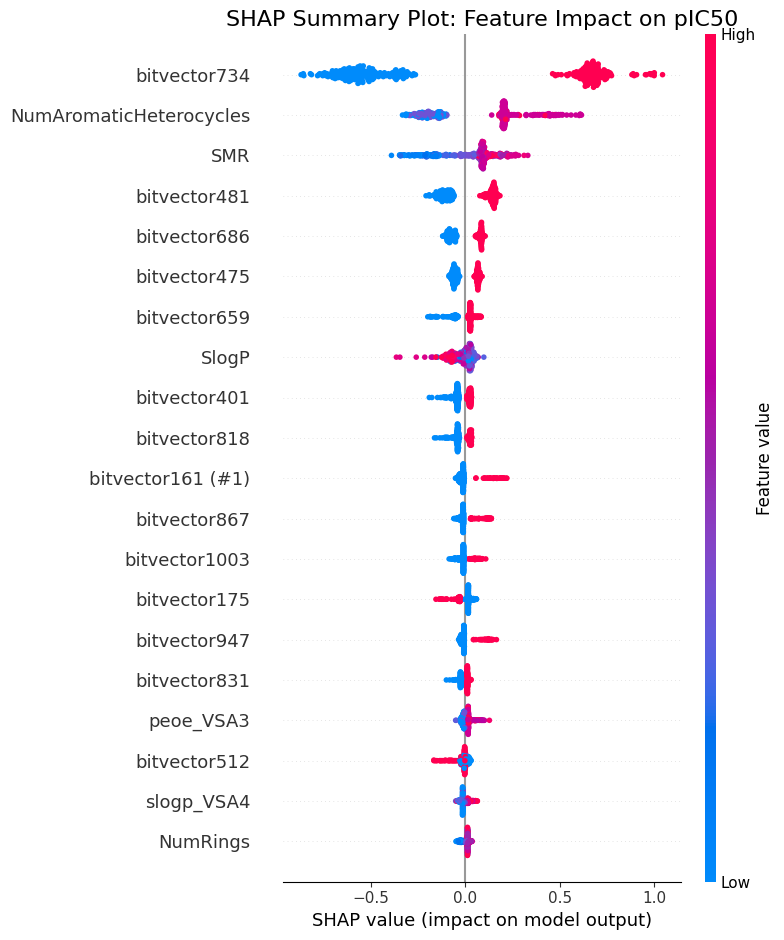

In [10]:
# SHAP Summary Plot (Beeswarm)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X, show=False)
plt.title("SHAP Summary Plot: Feature Impact on pIC50", fontsize=16)
plt.tight_layout()
plt.savefig("SHAP_summary_beeswarm.png", dpi=300)
plt.show()

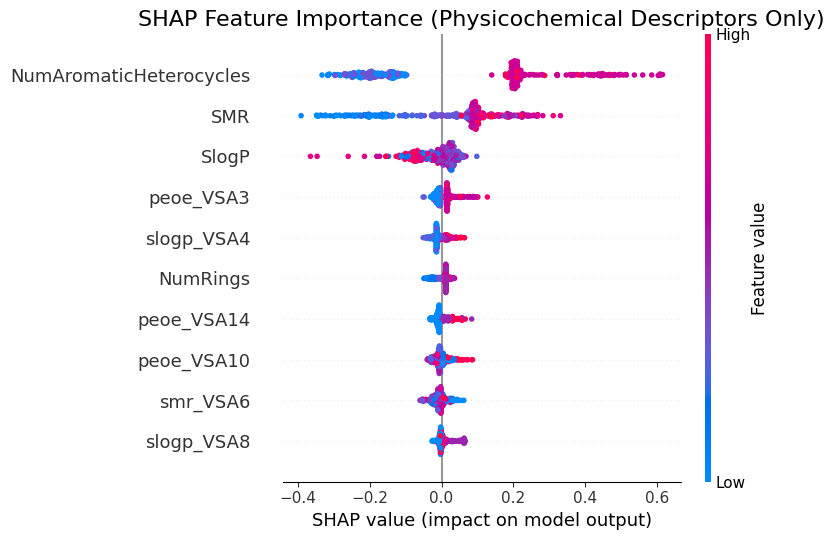

23


In [11]:
# --- SHAP Summary Plot without Fingerprint ---


descriptor_cols = [
    'SlogP', 'SMR', 'NumRings', 'NumAromaticRings',
    'NumAromaticHeterocycles', 'NumAromaticCarbocycles',
    'slogp_VSA4', 'slogp_VSA7', 'slogp_VSA8', 'slogp_VSA10', 'slogp_VSA11',
    'smr_VSA4', 'smr_VSA6',
    'peoe_VSA3', 'peoe_VSA4', 'peoe_VSA5', 'peoe_VSA10', 'peoe_VSA11', 'peoe_VSA14',
    'MQN11', 'MQN28', 'MQN35', 'MQN36'
]


selected_cols = [col for col in descriptor_cols if col in X.columns]

if len(selected_cols) > 0:

    indices = [X.columns.get_loc(col) for col in selected_cols]
    shap_values_selected = shap_values[:, indices]
    X_selected = X[selected_cols]

    # SHAP Summary Plot  Beeswarm
    plt.figure(figsize=(10, 8))
    shap.summary_plot(
        shap_values_selected,
        X_selected,
        show=False,
        max_display=10
    )
    plt.title("SHAP Feature Importance (Physicochemical Descriptors Only)", fontsize=16)
    plt.tight_layout()
    plt.savefig("SHAP_summary_descriptors_only.png", dpi=300)
    plt.show()

    print(f"{len(selected_cols)}")
else:
    print("no Descriptor in X please check")
    print(X.columns.tolist()[:10])

<Figure size 800x600 with 0 Axes>

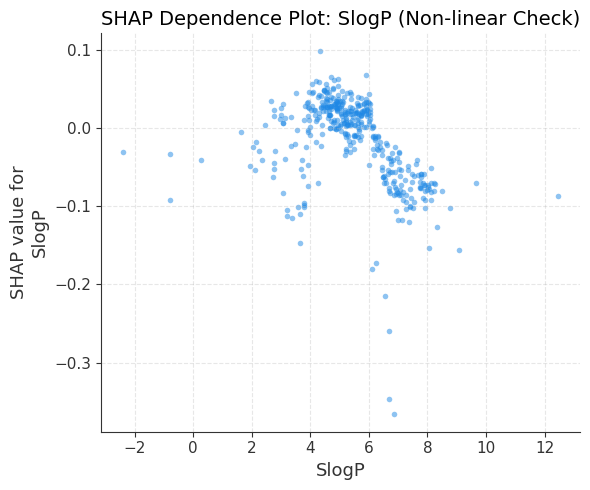

In [12]:
# Dependence Plot (Non-linear) ---

target_feature = 'SlogP'

if target_feature in X.columns:
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(
        target_feature,
        shap_values,
        X,
        interaction_index=None,
        alpha=0.5,
        show=False
    )
    plt.title(f"SHAP Dependence Plot: {target_feature} (Non-linear Check)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"SHAP_dependence_{target_feature}_nonlinear.png", dpi=300)
    plt.show()
else:
    print("no column")

<Figure size 800x600 with 0 Axes>

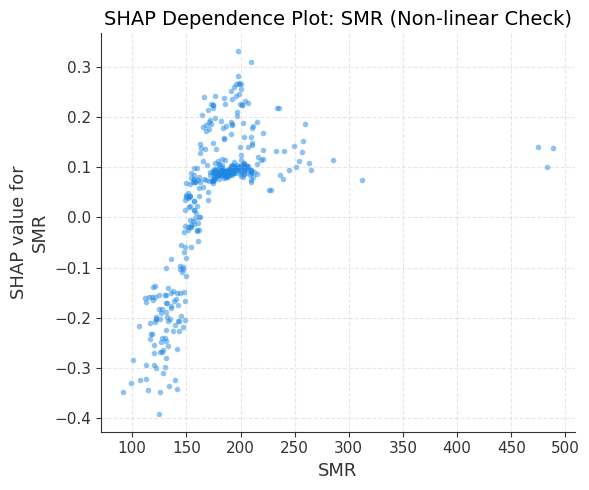

In [21]:
# Dependence Plot (Non-linear) ---
# interaction_index=None

#
target_feature = 'SMR'  #

if target_feature in X.columns:
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(
        target_feature,
        shap_values,
        X,
        interaction_index=None,
        alpha=0.5,
        show=False)
    plt.title(f"SHAP Dependence Plot: {target_feature} (Non-linear Check)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"SHAP_dependence_{target_feature}_nonlinear.png", dpi=300)
    plt.show()
else:
    print(f"no column {target_feature} ")

<Figure size 800x600 with 0 Axes>

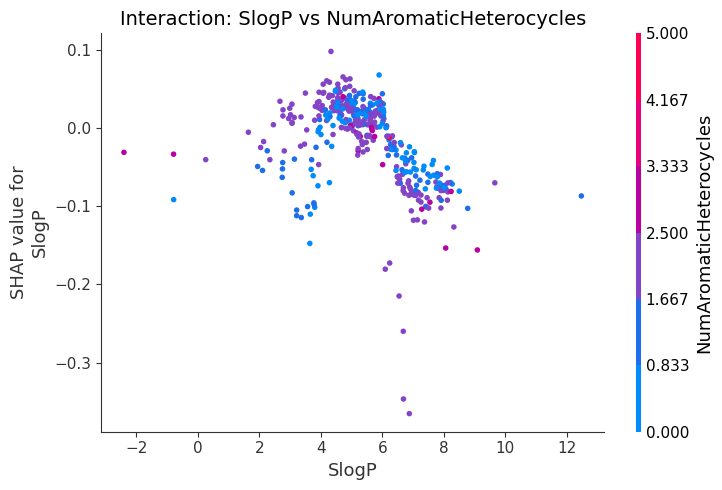

In [24]:
# Interaction Plot  ---

feature_x = 'SlogP'
feature_color = 'NumAromaticHeterocycles'

if feature_x in X.columns and feature_color in X.columns:
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(
    feature_x,
    shap_values,
    X,
    interaction_index=feature_color,
        show=False)
    plt.title(f"Interaction: {feature_x} vs {feature_color}", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"SHAP_interaction_{feature_x}_vs_{feature_color}.png", dpi=300)
    plt.show()
else:
    print(f" no cloumn {feature_x} or {feature_color}")